In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
RUSmonthyearERC = pd.read_csv('queries_results/RUS/RUS monthyear eventRC count.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
RUSmonthyearERC["Time"]=pd.to_datetime(RUSmonthyearERC['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
RUSmonthyearERC = RUSmonthyearERC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventRootCode',right_on='CAMEOEVENTCODE', how='left')

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


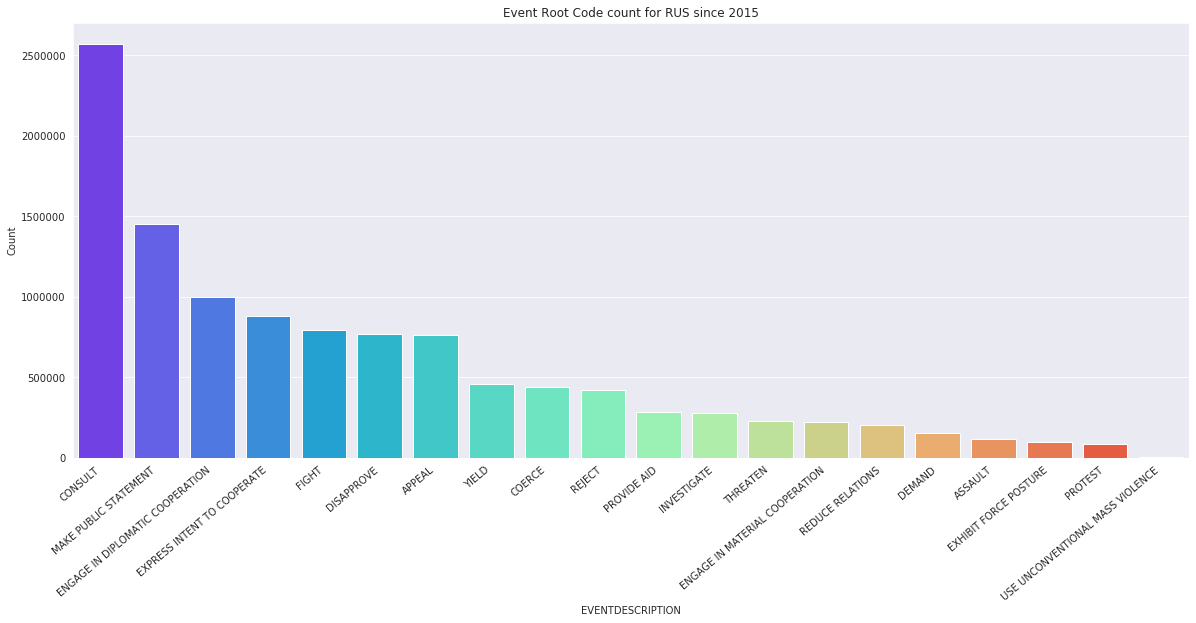

In [2]:
s = RUSmonthyearERC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(30)
g = sns.barplot(s.EVENTDESCRIPTION, s.Count, palette='rainbow')
g.set_title("Event Root Code count for RUS since 2015")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/RUS/RUSERC.png', bbox_inches='tight')

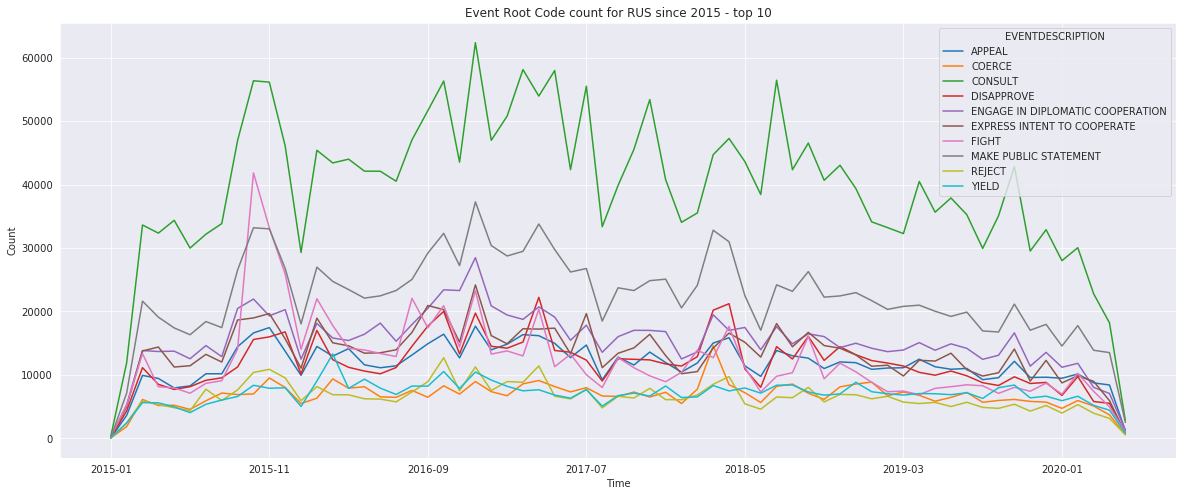

In [3]:
ile = 10
cols = RUSmonthyearERC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(ile)['EVENTDESCRIPTION']
s  = RUSmonthyearERC.loc[RUSmonthyearERC["EVENTDESCRIPTION"].isin(cols)]

s = s.groupby(["Time","EVENTDESCRIPTION"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Event Root Code count for RUS since 2015 - top {}".format(ile))
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/RUS/RUSERCinTIME.png', bbox_inches='tight')

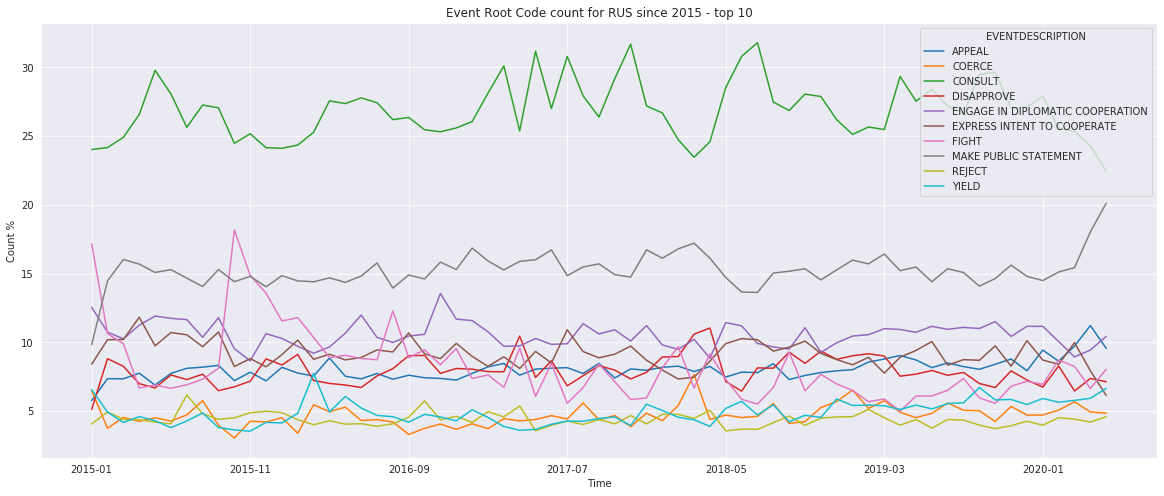

In [4]:
s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Event Root Code count for RUS since 2015 - top {}".format(ile))
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/RUS/RUSERCpercinTIME.png', bbox_inches='tight')